In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [340]:
df = pd.read_csv("casesBrazil.csv")

In [341]:
df

,day,cases
0,1,1
1,2,1
2,3,1
3,4,2
4,5,2
...,...,...
129,130,1546935
130,131,1580502
131,132,1605694
132,133,1630061


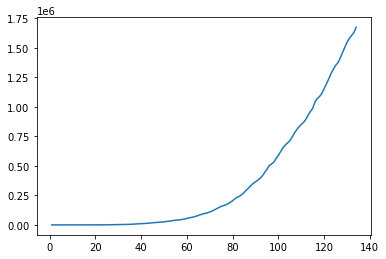

In [342]:
plt.plot(df['day'], df['cases'])
plt.show()

$ h(0) = \theta_0  +  \theta_1 x^1 ... \theta_3 x^3 $

In [343]:
# transformar dataset
#df["ones"] = np.ones(df.shape[0])

In [345]:
#normalizations

# plt.hist(df["day"], bins = 10)
# plt.show()

df_norm = pd.DataFrame(df["day"].apply(lambda x: (x - min(df["day"])) / (max(df["day"])-min(df["day"]))))
df_padr = pd.DataFrame(df["day"].apply(lambda x: (x - df["day"].mean())/(np.std(df["day"])) ))

In [346]:
df_norm.head()

,day
0,0.000000
1,0.007519
2,0.015038
3,0.022556
4,0.030075


In [347]:
for i in range(2,11):
    norm_name = "norm_x" + str(i)
    padr_name = "padr_x" + str(i)
    df_norm[norm_name] = df_norm["day"]**i
    df_padr[padr_name] = df_padr["day"]**i

In [348]:
df_padr.head()

,day,padr_x2,padr_x3,padr_x4,padr_x5,padr_x6,padr_x7,padr_x8,padr_x9,padr_x10
0,-1.719173,2.955556,-5.081111,8.735309,-15.017506,25.817690,-44.385074,76.305617,-131.182551,225.525490
1,-1.693321,2.867335,-4.855318,8.221610,-13.921822,23.574110,-39.918529,67.594871,-114.459795,193.817141
2,-1.667468,2.780451,-4.636315,7.730908,-12.891046,21.495413,-35.842924,59.766946,-99.659498,166.179072
3,-1.641616,2.694904,-4.423998,7.262507,-11.922250,19.571759,-32.129318,52.744010,-86.585425,142.140041
4,-1.615764,2.610693,-4.218264,6.815720,-11.012595,17.793755,-28.750510,46.454040,-75.058766,121.277254


In [349]:
def costFunction(X, y, theta):
    h = X.dot(theta)
    m = X.shape[0]
    J = 1/(2*m) * (np.sum((h-y)**2))
    return J

In [350]:
def gradientDescent(X, y, theta, alpha, num_iter):
    m = X.shape[0]
    cost_array = []
    for i in range(num_iter):
        cost_array.append(costFunction(X,y,theta))
        h = X.dot(theta) - y
        theta = theta - ((alpha/m) * X.T.dot(h))
    return theta, cost_array

In [351]:
x = np.array([[1,3],[2,4]], dtype=float)
y = np.array([5,6],dtype=float)
theta = np.array([1,2],dtype=float)
alpha = 0.5

y.reshape(len(y),1)
theta.reshape(len(theta),1)

new_theta,cost_array = gradientDescent(x,y,theta,alpha,1)

print(new_theta)

[-1.5 -3.5]


In [352]:
m,n = df_norm.shape
X_norm = np.array(())
X_norm = np.append(np.ones((m,1)),df_norm.values.reshape(m,n),axis = 1)
X_padr = np.array(())
X_padr = np.append(np.ones((m,1)),df_padr.values.reshape(m,n),axis = 1)
y = df["cases"].values.reshape(m,1)

In [353]:
theta_init = np.ones((X_norm.shape[1], 1))
alpha = 1
num_iter = 2000
theta_norm,cost_norm = gradientDescent(X_norm, y, theta_init, alpha, num_iter)

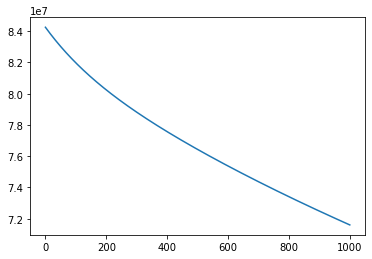

In [354]:
plt.plot(cost_norm[1000:])

In [356]:
predict = X_norm.dot(theta_norm)

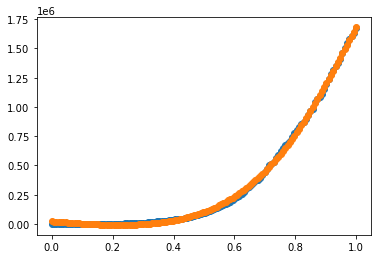

In [358]:
plt.scatter(df_norm["day"], df["cases"])
plt.scatter(df_norm["day"], predict)
plt.show()

In [404]:
a = (theta.dot(x[0]) - y[0]) * x[0][0]
b = (theta.dot(x[1]) - y[1]) * x[1][0]
c = (theta.dot(x[0]) - y[0]) * x[0][1]
d = (theta.dot(x[1]) - y[1]) * x[1][1]
theta[0] = theta[0] - (0.5/2) * (a+b)
theta[1] = theta[1] - (0.5/2) * (c+d)

print(theta)

[-1.5 -3.5]


In [405]:
x[0]

array([1., 3.])

In [406]:
theta.dot(x)

array([ -8.5, -18.5])

In [407]:
x.dot(theta)

array([-12., -17.])

In [408]:
np.dot(x[0],theta)

-12.0

In [409]:
np.dot(x,new_theta)

array([-12., -17.])

In [410]:
theta = theta - ((alpha/m) * X.T.dot(pred - y))

NameError: name 'm' is not defined

In [ ]:
new_theta.dot(x)

In [ ]:
np.dot(new_theta, x)